In [1]:
import pandas as pd
import numpy as np

#reading the train file
df_train = pd.read_csv('train_s3TEQDk.csv')
df_train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [9]:
##Converting the categorical to numerical variable
df_null = df_train.fillna('Unknown')

dummies_new = pd.get_dummies(data=df_null, columns=['Gender', 'Occupation', 'Channel_Code',
                                                 'Is_Active', 'Credit_Product'])
dummies_new.drop(['Region_Code'], axis = 1, inplace = True)

dummies_new.head(5)

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_No,Is_Active_Yes,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes
0,NNVBBKZB,73,43,1045696,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,IDD62UNG,30,32,581988,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,HD3DSEMC,56,26,1484315,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
3,BF3NC7KV,34,19,470454,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
4,TEASRWXV,30,33,886787,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0


# Started using the category boosting

In [3]:
from catboost import CatBoostClassifier

#importing the important libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, linear_model, metrics, tree, ensemble
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pylab as plt
%matplotlib inline

In [18]:
##getting the train test split
train_y = dummies_new['Is_Lead']
train_x = dummies_new.drop(['ID', 'Is_Lead'], axis = 1)

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.7, random_state = 32)

In [19]:
CBC = CatBoostClassifier(random_state = 32)

parameters = {'depth': [5,6,7],
              'learning_rate': [0.3, 0.4],
              'iterations': [30, 40]
    
}

clf = GridSearchCV(CBC, parameters, cv = 2, n_jobs = 1, verbose=3, scoring='roc_auc') 
clf.fit(train_x, train_y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] depth=5, iterations=30, learning_rate=0.3 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.5516432	total: 19.3ms	remaining: 560ms
1:	learn: 0.4721824	total: 48.2ms	remaining: 675ms
2:	learn: 0.4262802	total: 64.8ms	remaining: 583ms
3:	learn: 0.3977103	total: 76.7ms	remaining: 499ms
4:	learn: 0.3794930	total: 89.6ms	remaining: 448ms
5:	learn: 0.3683816	total: 103ms	remaining: 411ms
6:	learn: 0.3607292	total: 116ms	remaining: 381ms
7:	learn: 0.3561480	total: 128ms	remaining: 352ms
8:	learn: 0.3529195	total: 140ms	remaining: 327ms
9:	learn: 0.3503758	total: 152ms	remaining: 304ms
10:	learn: 0.3490274	total: 165ms	remaining: 284ms
11:	learn: 0.3478822	total: 176ms	remaining: 264ms
12:	learn: 0.3472076	total: 188ms	remaining: 246ms
13:	learn: 0.3463011	total: 200ms	remaining: 229ms
14:	learn: 0.3451665	total: 215ms	remaining: 215ms
15:	learn: 0.3441551	total: 230ms	remaining: 202ms
16:	learn: 0.3439251	total: 249ms	remaining: 191ms
17:	learn: 0.3434692	total: 263ms	remaining: 175ms
18:	learn: 0.3431418	total: 275ms	remaining: 159ms
19:	learn: 0.3428871	total: 287ms	re

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


7:	learn: 0.3613494	total: 144ms	remaining: 395ms
8:	learn: 0.3581970	total: 170ms	remaining: 397ms
9:	learn: 0.3555957	total: 186ms	remaining: 372ms
10:	learn: 0.3537262	total: 202ms	remaining: 349ms
11:	learn: 0.3525066	total: 219ms	remaining: 328ms
12:	learn: 0.3519080	total: 231ms	remaining: 302ms
13:	learn: 0.3507292	total: 244ms	remaining: 279ms
14:	learn: 0.3502626	total: 256ms	remaining: 256ms
15:	learn: 0.3496342	total: 269ms	remaining: 235ms
16:	learn: 0.3494469	total: 281ms	remaining: 215ms
17:	learn: 0.3490565	total: 293ms	remaining: 195ms
18:	learn: 0.3488929	total: 307ms	remaining: 178ms
19:	learn: 0.3485902	total: 323ms	remaining: 161ms
20:	learn: 0.3481478	total: 336ms	remaining: 144ms
21:	learn: 0.3477508	total: 351ms	remaining: 128ms
22:	learn: 0.3475294	total: 368ms	remaining: 112ms
23:	learn: 0.3471741	total: 382ms	remaining: 95.5ms
24:	learn: 0.3469898	total: 394ms	remaining: 78.7ms
25:	learn: 0.3468319	total: 407ms	remaining: 62.5ms
26:	learn: 0.3464700	total: 421

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


6:	learn: 0.3510457	total: 103ms	remaining: 339ms
7:	learn: 0.3484140	total: 125ms	remaining: 345ms
8:	learn: 0.3470089	total: 144ms	remaining: 336ms
9:	learn: 0.3456789	total: 160ms	remaining: 320ms
10:	learn: 0.3451498	total: 181ms	remaining: 313ms
11:	learn: 0.3448737	total: 196ms	remaining: 293ms
12:	learn: 0.3440550	total: 209ms	remaining: 273ms
13:	learn: 0.3436707	total: 222ms	remaining: 254ms
14:	learn: 0.3429240	total: 235ms	remaining: 235ms
15:	learn: 0.3424346	total: 248ms	remaining: 217ms
16:	learn: 0.3422455	total: 264ms	remaining: 202ms
17:	learn: 0.3417629	total: 279ms	remaining: 186ms
18:	learn: 0.3415153	total: 296ms	remaining: 171ms
19:	learn: 0.3412451	total: 314ms	remaining: 157ms
20:	learn: 0.3409998	total: 335ms	remaining: 144ms
21:	learn: 0.3407690	total: 354ms	remaining: 129ms
22:	learn: 0.3406562	total: 377ms	remaining: 115ms
23:	learn: 0.3404088	total: 395ms	remaining: 98.8ms
24:	learn: 0.3401141	total: 413ms	remaining: 82.5ms
25:	learn: 0.3400226	total: 431ms

19:	learn: 0.3412451	total: 286ms	remaining: 286ms
20:	learn: 0.3409998	total: 303ms	remaining: 275ms
21:	learn: 0.3407690	total: 318ms	remaining: 260ms
22:	learn: 0.3406562	total: 334ms	remaining: 247ms
23:	learn: 0.3404088	total: 349ms	remaining: 232ms
24:	learn: 0.3401141	total: 361ms	remaining: 217ms
25:	learn: 0.3400226	total: 373ms	remaining: 201ms
26:	learn: 0.3398613	total: 385ms	remaining: 185ms
27:	learn: 0.3398157	total: 396ms	remaining: 170ms
28:	learn: 0.3396409	total: 408ms	remaining: 155ms
29:	learn: 0.3392849	total: 421ms	remaining: 140ms
30:	learn: 0.3392259	total: 433ms	remaining: 126ms
31:	learn: 0.3389985	total: 446ms	remaining: 112ms
32:	learn: 0.3388726	total: 459ms	remaining: 97.3ms
33:	learn: 0.3387344	total: 476ms	remaining: 83.9ms
34:	learn: 0.3385078	total: 491ms	remaining: 70.2ms
35:	learn: 0.3380463	total: 505ms	remaining: 56.1ms
36:	learn: 0.3379335	total: 516ms	remaining: 41.8ms
37:	learn: 0.3376811	total: 532ms	remaining: 28ms
38:	learn: 0.3374928	total:

[CV]  depth=6, iterations=30, learning_rate=0.4, score=0.869, total=   0.8s
[CV] depth=6, iterations=30, learning_rate=0.4 .......................
0:	learn: 0.5160089	total: 14ms	remaining: 405ms
1:	learn: 0.4358600	total: 28.4ms	remaining: 397ms
2:	learn: 0.3956469	total: 42.5ms	remaining: 383ms
3:	learn: 0.3749070	total: 56.8ms	remaining: 369ms
4:	learn: 0.3644237	total: 71.9ms	remaining: 359ms
5:	learn: 0.3581754	total: 88.8ms	remaining: 355ms
6:	learn: 0.3542157	total: 105ms	remaining: 344ms
7:	learn: 0.3518493	total: 127ms	remaining: 349ms
8:	learn: 0.3508509	total: 145ms	remaining: 337ms
9:	learn: 0.3495730	total: 160ms	remaining: 320ms
10:	learn: 0.3487516	total: 175ms	remaining: 303ms
11:	learn: 0.3481060	total: 199ms	remaining: 298ms
12:	learn: 0.3474726	total: 215ms	remaining: 281ms
13:	learn: 0.3474399	total: 224ms	remaining: 257ms
14:	learn: 0.3472053	total: 240ms	remaining: 240ms
15:	learn: 0.3464522	total: 261ms	remaining: 229ms
16:	learn: 0.3460131	total: 285ms	remaining

[CV]  depth=6, iterations=40, learning_rate=0.4, score=0.869, total=   1.2s
[CV] depth=6, iterations=40, learning_rate=0.4 .......................
0:	learn: 0.5160089	total: 14.8ms	remaining: 577ms
1:	learn: 0.4358600	total: 28.7ms	remaining: 546ms
2:	learn: 0.3956469	total: 43.4ms	remaining: 535ms
3:	learn: 0.3749070	total: 59.7ms	remaining: 538ms
4:	learn: 0.3644237	total: 75.2ms	remaining: 527ms
5:	learn: 0.3581754	total: 90ms	remaining: 510ms
6:	learn: 0.3542157	total: 109ms	remaining: 512ms
7:	learn: 0.3518493	total: 124ms	remaining: 496ms
8:	learn: 0.3508509	total: 138ms	remaining: 477ms
9:	learn: 0.3495730	total: 154ms	remaining: 462ms
10:	learn: 0.3487516	total: 171ms	remaining: 451ms
11:	learn: 0.3481060	total: 187ms	remaining: 437ms
12:	learn: 0.3474726	total: 206ms	remaining: 427ms
13:	learn: 0.3474399	total: 216ms	remaining: 401ms
14:	learn: 0.3472053	total: 232ms	remaining: 387ms
15:	learn: 0.3464522	total: 248ms	remaining: 373ms
16:	learn: 0.3460131	total: 269ms	remaining

26:	learn: 0.3399227	total: 552ms	remaining: 61.3ms
27:	learn: 0.3394667	total: 573ms	remaining: 40.9ms
28:	learn: 0.3391572	total: 591ms	remaining: 20.4ms
29:	learn: 0.3387502	total: 610ms	remaining: 0us
[CV]  depth=7, iterations=30, learning_rate=0.4, score=0.874, total=   0.9s
[CV] depth=7, iterations=40, learning_rate=0.3 .......................
0:	learn: 0.5491022	total: 21.7ms	remaining: 847ms
1:	learn: 0.4691844	total: 43.8ms	remaining: 831ms
2:	learn: 0.4239291	total: 74.2ms	remaining: 915ms
3:	learn: 0.3957985	total: 97.4ms	remaining: 877ms
4:	learn: 0.3797702	total: 116ms	remaining: 811ms
5:	learn: 0.3671126	total: 138ms	remaining: 782ms
6:	learn: 0.3585218	total: 164ms	remaining: 771ms
7:	learn: 0.3536814	total: 188ms	remaining: 752ms
8:	learn: 0.3500676	total: 210ms	remaining: 724ms
9:	learn: 0.3473612	total: 231ms	remaining: 693ms
10:	learn: 0.3461401	total: 251ms	remaining: 663ms
11:	learn: 0.3446852	total: 270ms	remaining: 631ms
12:	learn: 0.3434385	total: 295ms	remainin

34:	learn: 0.3366147	total: 667ms	remaining: 95.2ms
35:	learn: 0.3361432	total: 688ms	remaining: 76.4ms
36:	learn: 0.3359383	total: 709ms	remaining: 57.5ms
37:	learn: 0.3355993	total: 727ms	remaining: 38.3ms
38:	learn: 0.3352834	total: 749ms	remaining: 19.2ms
39:	learn: 0.3348886	total: 765ms	remaining: 0us
[CV]  depth=7, iterations=40, learning_rate=0.4, score=0.873, total=   1.1s
0:	learn: 0.5145989	total: 24.2ms	remaining: 943ms
1:	learn: 0.4348375	total: 45.9ms	remaining: 872ms
2:	learn: 0.3942200	total: 70.3ms	remaining: 868ms
3:	learn: 0.3735091	total: 90.7ms	remaining: 817ms


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   22.9s finished


4:	learn: 0.3626370	total: 124ms	remaining: 866ms
5:	learn: 0.3571867	total: 147ms	remaining: 832ms
6:	learn: 0.3532893	total: 170ms	remaining: 801ms
7:	learn: 0.3512774	total: 191ms	remaining: 765ms
8:	learn: 0.3497903	total: 212ms	remaining: 729ms
9:	learn: 0.3488573	total: 230ms	remaining: 691ms
10:	learn: 0.3476961	total: 250ms	remaining: 660ms
11:	learn: 0.3468704	total: 272ms	remaining: 634ms
12:	learn: 0.3465384	total: 291ms	remaining: 605ms
13:	learn: 0.3461336	total: 316ms	remaining: 587ms
14:	learn: 0.3456355	total: 348ms	remaining: 581ms
15:	learn: 0.3453679	total: 368ms	remaining: 552ms
16:	learn: 0.3453174	total: 381ms	remaining: 516ms
17:	learn: 0.3452396	total: 399ms	remaining: 488ms
18:	learn: 0.3451307	total: 417ms	remaining: 460ms
19:	learn: 0.3447962	total: 437ms	remaining: 437ms
20:	learn: 0.3445142	total: 460ms	remaining: 416ms
21:	learn: 0.3443685	total: 482ms	remaining: 394ms
22:	learn: 0.3441537	total: 501ms	remaining: 370ms
23:	learn: 0.3440470	total: 522ms	rem

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x00000221EAA2D908>,
             iid='warn', n_jobs=1,
             param_grid={'depth': [5, 6, 7], 'iterations': [30, 40],
                         'learning_rate': [0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [20]:
clf.best_params_

{'depth': 5, 'iterations': 40, 'learning_rate': 0.4}

In [21]:
rf_preds = clf.predict_proba(test_x)[:,1]
train_preds = clf.predict_proba(train_x)[:,1]
pred_y = clf.predict(test_x)


auc = metrics.roc_auc_score(test_y, rf_preds)
logloss = metrics.log_loss(test_y, rf_preds)

print(f'auc score is {auc}')
print(f'log loss is {logloss}')
print(f'best parameters are {clf.best_params_}')

auc score is 0.8731158085210002
log loss is 0.34522681869525623
best parameters are {'depth': 5, 'iterations': 40, 'learning_rate': 0.4}


In [22]:
##remember to get the confusion matrix
matrix = metrics.confusion_matrix(test_y, pred_y)
matrix

array([[125488,   5708],
       [ 18365,  22447]], dtype=int64)

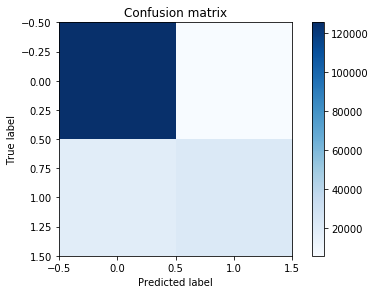

In [23]:
##visualizing the confusion matrix
def plot_confusion_matrix(cm, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(matrix)

In [24]:
##don't feel like doing any feature engineering now, will do it if the first submission does not give a high score
##also didn't deal with the null values in Credit_Product properly, to be kept in mind for v2
##reading the test data and getting the predictions now, duplicates have been checked for in Excel
test = pd.read_csv('test_mSzZ8RL.csv')
test.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [25]:
##should have created a funcion to get the dummies and fill the null values so that the steps are not repeated for test set
##alas!
##Converting the categorical to numerical variable
test_null = test.fillna('Unknown')

dummies_test = pd.get_dummies(data=test_null, columns=['Gender', 'Occupation', 'Channel_Code',
                                                 'Is_Active', 'Credit_Product'])
dummies_test.drop(['Region_Code'], axis = 1, inplace = True)

dummies_test

,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_No,Is_Active_Yes,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes
0,VBENBARO,29,25,742366,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,CCMEWNKY,43,49,925537,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,VK3KGA9M,31,14,215949,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
3,TT8RPZVC,29,33,868070,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
4,SHQZEYTZ,29,19,657087,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,52,86,4242558,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
105308,CWQ72DWS,55,86,1159153,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
105309,HDESC8GU,35,15,1703727,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0
105310,2PW4SFCA,53,93,737178,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0


In [26]:
##getting the predicted value for test set
test_dummies_x = dummies_test.drop(['ID'], axis = 1)
test_predict_y = clf.predict_proba(test_dummies_x)[:,1]
df_test_y = pd.DataFrame(test_predict_y, columns = ['Is_Lead'])
df_test_x = dummies_test[['ID']]
output = df_test_x.join(df_test_y)
output.to_csv('hackathon_output_v5.csv', index = False)

# Next getting the score with Region Code 

In [8]:
##Converting the categorical to numerical variable
df_null = df_train.fillna('Unknown')

dummies_new = pd.get_dummies(data=df_null, columns=['Gender', 'Occupation', 'Channel_Code',
                                                 'Is_Active', 'Credit_Product', 'Region_Code'])

dummies_new.head(5)

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,NNVBBKZB,73,43,1045696,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,IDD62UNG,30,32,581988,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,56,26,1484315,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BF3NC7KV,34,19,470454,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,TEASRWXV,30,33,886787,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
##getting the train test split
train_y = dummies_new['Is_Lead']
train_x = dummies_new.drop(['ID', 'Is_Lead'], axis = 1)

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.7, random_state = 32)

In [10]:
CBC = CatBoostClassifier(random_state = 32)

parameters = {'depth': [5,6,7],
              'learning_rate': [0.3, 0.4],
              'iterations': [30, 40]
    
}

clf = GridSearchCV(CBC, parameters, cv = 2, n_jobs = 1, verbose=3, scoring='roc_auc') 
clf.fit(train_x, train_y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] depth=5, iterations=30, learning_rate=0.3 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.4940056	total: 47.6ms	remaining: 1.38s
1:	learn: 0.4177893	total: 72.8ms	remaining: 1.02s
2:	learn: 0.3828461	total: 96.7ms	remaining: 870ms
3:	learn: 0.3665325	total: 123ms	remaining: 802ms
4:	learn: 0.3565264	total: 150ms	remaining: 749ms
5:	learn: 0.3521676	total: 173ms	remaining: 694ms
6:	learn: 0.3499001	total: 197ms	remaining: 646ms
7:	learn: 0.3488138	total: 222ms	remaining: 610ms
8:	learn: 0.3467245	total: 246ms	remaining: 575ms
9:	learn: 0.3450963	total: 277ms	remaining: 554ms
10:	learn: 0.3443245	total: 299ms	remaining: 516ms
11:	learn: 0.3439829	total: 324ms	remaining: 485ms
12:	learn: 0.3433844	total: 346ms	remaining: 453ms
13:	learn: 0.3428622	total: 368ms	remaining: 421ms
14:	learn: 0.3423400	total: 394ms	remaining: 394ms
15:	learn: 0.3419075	total: 416ms	remaining: 364ms
16:	learn: 0.3416504	total: 443ms	remaining: 339ms
17:	learn: 0.3415387	total: 480ms	remaining: 320ms
18:	learn: 0.3412500	total: 528ms	remaining: 306ms
19:	learn: 0.3410109	total: 557ms	rema

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


0:	learn: 0.4969393	total: 36ms	remaining: 1.04s
1:	learn: 0.4226176	total: 72.9ms	remaining: 1.02s
2:	learn: 0.3876518	total: 104ms	remaining: 932ms
3:	learn: 0.3726273	total: 125ms	remaining: 816ms
4:	learn: 0.3623277	total: 163ms	remaining: 814ms
5:	learn: 0.3588685	total: 187ms	remaining: 749ms
6:	learn: 0.3554999	total: 214ms	remaining: 703ms
7:	learn: 0.3536654	total: 251ms	remaining: 690ms
8:	learn: 0.3521700	total: 279ms	remaining: 650ms
9:	learn: 0.3512673	total: 314ms	remaining: 629ms
10:	learn: 0.3506049	total: 353ms	remaining: 610ms
11:	learn: 0.3494276	total: 386ms	remaining: 580ms
12:	learn: 0.3490026	total: 424ms	remaining: 554ms
13:	learn: 0.3484296	total: 462ms	remaining: 529ms
14:	learn: 0.3481625	total: 500ms	remaining: 500ms
15:	learn: 0.3478271	total: 540ms	remaining: 472ms
16:	learn: 0.3474784	total: 582ms	remaining: 445ms
17:	learn: 0.3469353	total: 613ms	remaining: 409ms
18:	learn: 0.3467594	total: 639ms	remaining: 370ms
19:	learn: 0.3462411	total: 678ms	remaini

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


1:	learn: 0.3854611	total: 52ms	remaining: 729ms
2:	learn: 0.3679239	total: 85.3ms	remaining: 768ms
3:	learn: 0.3560978	total: 131ms	remaining: 849ms
4:	learn: 0.3507727	total: 155ms	remaining: 774ms
5:	learn: 0.3491003	total: 183ms	remaining: 733ms
6:	learn: 0.3477226	total: 207ms	remaining: 682ms
7:	learn: 0.3459105	total: 240ms	remaining: 659ms
8:	learn: 0.3447439	total: 259ms	remaining: 605ms
9:	learn: 0.3442957	total: 295ms	remaining: 590ms
10:	learn: 0.3438022	total: 322ms	remaining: 556ms
11:	learn: 0.3425066	total: 347ms	remaining: 520ms
12:	learn: 0.3423156	total: 370ms	remaining: 484ms
13:	learn: 0.3419294	total: 395ms	remaining: 451ms
14:	learn: 0.3415696	total: 417ms	remaining: 417ms
15:	learn: 0.3410967	total: 443ms	remaining: 387ms
16:	learn: 0.3406971	total: 466ms	remaining: 356ms
17:	learn: 0.3404067	total: 492ms	remaining: 328ms
18:	learn: 0.3402087	total: 531ms	remaining: 308ms
19:	learn: 0.3399696	total: 571ms	remaining: 285ms
20:	learn: 0.3396603	total: 602ms	remain

14:	learn: 0.3415696	total: 449ms	remaining: 748ms
15:	learn: 0.3410967	total: 470ms	remaining: 704ms
16:	learn: 0.3406971	total: 500ms	remaining: 676ms
17:	learn: 0.3404067	total: 533ms	remaining: 652ms
18:	learn: 0.3402087	total: 558ms	remaining: 617ms
19:	learn: 0.3399696	total: 583ms	remaining: 583ms
20:	learn: 0.3396603	total: 616ms	remaining: 557ms
21:	learn: 0.3395101	total: 651ms	remaining: 533ms
22:	learn: 0.3392171	total: 702ms	remaining: 519ms
23:	learn: 0.3388389	total: 744ms	remaining: 496ms
24:	learn: 0.3385768	total: 779ms	remaining: 467ms
25:	learn: 0.3382238	total: 816ms	remaining: 439ms
26:	learn: 0.3379738	total: 849ms	remaining: 409ms
27:	learn: 0.3377261	total: 880ms	remaining: 377ms
28:	learn: 0.3374972	total: 910ms	remaining: 345ms
29:	learn: 0.3372666	total: 938ms	remaining: 313ms
30:	learn: 0.3369594	total: 961ms	remaining: 279ms
31:	learn: 0.3367003	total: 985ms	remaining: 246ms
32:	learn: 0.3363189	total: 1.02s	remaining: 216ms
33:	learn: 0.3361799	total: 1.0

27:	learn: 0.3332205	total: 935ms	remaining: 66.8ms
28:	learn: 0.3327655	total: 971ms	remaining: 33.5ms
29:	learn: 0.3324161	total: 997ms	remaining: 0us
[CV]  depth=6, iterations=30, learning_rate=0.4, score=0.868, total=   1.4s
[CV] depth=6, iterations=30, learning_rate=0.4 .......................
0:	learn: 0.4508218	total: 44ms	remaining: 1.28s
1:	learn: 0.3853166	total: 79.3ms	remaining: 1.11s
2:	learn: 0.3641602	total: 106ms	remaining: 958ms
3:	learn: 0.3581430	total: 137ms	remaining: 892ms
4:	learn: 0.3542851	total: 169ms	remaining: 843ms
5:	learn: 0.3528018	total: 201ms	remaining: 804ms
6:	learn: 0.3512292	total: 232ms	remaining: 764ms
7:	learn: 0.3484576	total: 282ms	remaining: 775ms
8:	learn: 0.3476674	total: 324ms	remaining: 757ms
9:	learn: 0.3471552	total: 364ms	remaining: 727ms
10:	learn: 0.3461949	total: 404ms	remaining: 698ms
11:	learn: 0.3458198	total: 434ms	remaining: 650ms
12:	learn: 0.3450427	total: 461ms	remaining: 602ms
13:	learn: 0.3444027	total: 496ms	remaining: 56

[CV]  depth=6, iterations=40, learning_rate=0.4, score=0.868, total=   1.7s
[CV] depth=6, iterations=40, learning_rate=0.4 .......................
0:	learn: 0.4508218	total: 56ms	remaining: 2.18s
1:	learn: 0.3853166	total: 119ms	remaining: 2.27s
2:	learn: 0.3641602	total: 159ms	remaining: 1.96s
3:	learn: 0.3581430	total: 206ms	remaining: 1.85s
4:	learn: 0.3542851	total: 257ms	remaining: 1.79s
5:	learn: 0.3528018	total: 305ms	remaining: 1.73s
6:	learn: 0.3512292	total: 329ms	remaining: 1.55s
7:	learn: 0.3484576	total: 357ms	remaining: 1.43s
8:	learn: 0.3476674	total: 384ms	remaining: 1.32s
9:	learn: 0.3471552	total: 410ms	remaining: 1.23s
10:	learn: 0.3461949	total: 438ms	remaining: 1.15s
11:	learn: 0.3458198	total: 470ms	remaining: 1.1s
12:	learn: 0.3450427	total: 496ms	remaining: 1.03s
13:	learn: 0.3444027	total: 530ms	remaining: 985ms
14:	learn: 0.3437743	total: 557ms	remaining: 929ms
15:	learn: 0.3433322	total: 592ms	remaining: 888ms
16:	learn: 0.3430017	total: 621ms	remaining: 840m

18:	learn: 0.3373789	total: 691ms	remaining: 400ms
19:	learn: 0.3368993	total: 735ms	remaining: 367ms
20:	learn: 0.3363062	total: 774ms	remaining: 332ms
21:	learn: 0.3355537	total: 819ms	remaining: 298ms
22:	learn: 0.3350634	total: 855ms	remaining: 260ms
23:	learn: 0.3346293	total: 892ms	remaining: 223ms
24:	learn: 0.3339110	total: 940ms	remaining: 188ms
25:	learn: 0.3337150	total: 968ms	remaining: 149ms
26:	learn: 0.3332082	total: 999ms	remaining: 111ms
27:	learn: 0.3326685	total: 1.03s	remaining: 73.7ms
28:	learn: 0.3321540	total: 1.06s	remaining: 36.6ms
29:	learn: 0.3316247	total: 1.1s	remaining: 0us
[CV]  depth=7, iterations=30, learning_rate=0.4, score=0.872, total=   1.5s
[CV] depth=7, iterations=40, learning_rate=0.3 .......................
0:	learn: 0.4906022	total: 33.5ms	remaining: 1.31s
1:	learn: 0.4097347	total: 65.1ms	remaining: 1.24s
2:	learn: 0.3779797	total: 86.3ms	remaining: 1.06s
3:	learn: 0.3637774	total: 123ms	remaining: 1.1s
4:	learn: 0.3538394	total: 162ms	remaini

23:	learn: 0.3346293	total: 974ms	remaining: 649ms
24:	learn: 0.3339110	total: 1.02s	remaining: 613ms
25:	learn: 0.3337150	total: 1.05s	remaining: 565ms
26:	learn: 0.3332082	total: 1.08s	remaining: 520ms
27:	learn: 0.3326685	total: 1.12s	remaining: 481ms
28:	learn: 0.3321540	total: 1.15s	remaining: 437ms
29:	learn: 0.3316247	total: 1.19s	remaining: 396ms
30:	learn: 0.3308815	total: 1.24s	remaining: 359ms
31:	learn: 0.3299389	total: 1.27s	remaining: 319ms
32:	learn: 0.3292057	total: 1.31s	remaining: 277ms
33:	learn: 0.3286745	total: 1.34s	remaining: 236ms
34:	learn: 0.3278231	total: 1.37s	remaining: 196ms
35:	learn: 0.3272740	total: 1.41s	remaining: 156ms
36:	learn: 0.3265488	total: 1.46s	remaining: 118ms
37:	learn: 0.3259994	total: 1.49s	remaining: 78.3ms
38:	learn: 0.3253022	total: 1.52s	remaining: 39ms
39:	learn: 0.3247190	total: 1.55s	remaining: 0us
[CV]  depth=7, iterations=40, learning_rate=0.4, score=0.871, total=   1.9s


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   39.9s finished


0:	learn: 0.4957384	total: 53.5ms	remaining: 2.08s
1:	learn: 0.4183908	total: 99.9ms	remaining: 1.9s
2:	learn: 0.3875958	total: 138ms	remaining: 1.7s
3:	learn: 0.3681194	total: 175ms	remaining: 1.58s
4:	learn: 0.3601990	total: 213ms	remaining: 1.49s
5:	learn: 0.3567670	total: 241ms	remaining: 1.36s
6:	learn: 0.3530665	total: 280ms	remaining: 1.32s
7:	learn: 0.3512926	total: 333ms	remaining: 1.33s
8:	learn: 0.3503481	total: 377ms	remaining: 1.3s
9:	learn: 0.3494042	total: 420ms	remaining: 1.26s
10:	learn: 0.3484509	total: 483ms	remaining: 1.27s
11:	learn: 0.3480545	total: 543ms	remaining: 1.27s
12:	learn: 0.3477832	total: 589ms	remaining: 1.22s
13:	learn: 0.3474853	total: 640ms	remaining: 1.19s
14:	learn: 0.3468875	total: 680ms	remaining: 1.13s
15:	learn: 0.3461215	total: 748ms	remaining: 1.12s
16:	learn: 0.3459661	total: 788ms	remaining: 1.06s
17:	learn: 0.3456204	total: 818ms	remaining: 999ms
18:	learn: 0.3453890	total: 853ms	remaining: 943ms
19:	learn: 0.3452499	total: 890ms	remainin

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020E00078978>,
             iid='warn', n_jobs=1,
             param_grid={'depth': [5, 6, 7], 'iterations': [30, 40],
                         'learning_rate': [0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [11]:
rf_preds = clf.predict_proba(test_x)[:,1]
train_preds = clf.predict_proba(train_x)[:,1]
pred_y = clf.predict(test_x)


auc = metrics.roc_auc_score(test_y, rf_preds)
logloss = metrics.log_loss(test_y, rf_preds)

print(f'auc score is {auc}')
print(f'log loss is {logloss}')
print(f'best parameters are {clf.best_params_}')

auc score is 0.8734160479803811
log loss is 0.34518430489313107
best parameters are {'depth': 5, 'iterations': 40, 'learning_rate': 0.3}


In [12]:
##remember to get the confusion matrix
matrix = metrics.confusion_matrix(test_y, pred_y)
matrix

array([[125723,   5473],
       [ 18660,  22152]], dtype=int64)

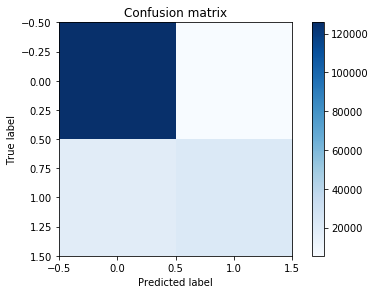

In [13]:
##visualizing the confusion matrix
def plot_confusion_matrix(cm, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(matrix)

In [14]:
##no feature engineering as of yet, will look at correlation as well afterwards
##also didn't deal with the null values in Credit_Product properly, to be kept in mind for v2
##reading the test data and getting the predictions now, duplicates have been checked for in Excel
test = pd.read_csv('test_mSzZ8RL.csv')
test.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [16]:
##should have created a funcion to get the dummies and fill the null values so that the steps are not repeated for test set
##alas!
##Converting the categorical to numerical variable
test_null = test.fillna('Unknown')

dummies_test = pd.get_dummies(data=test_null, columns=['Gender', 'Occupation', 'Channel_Code',
                                                 'Is_Active', 'Credit_Product', 'Region_Code'])

dummies_test.head(5)

,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,VBENBARO,29,25,742366,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCMEWNKY,43,49,925537,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,VK3KGA9M,31,14,215949,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TT8RPZVC,29,33,868070,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SHQZEYTZ,29,19,657087,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
##getting the predicted value for test set
test_dummies_x = dummies_test.drop(['ID'], axis = 1)
test_predict_y = clf.predict_proba(test_dummies_x)[:,1]
df_test_y = pd.DataFrame(test_predict_y, columns = ['Is_Lead'])
df_test_x = dummies_test[['ID']]
output = df_test_x.join(df_test_y)
output.to_csv('hackathon_output_v6.csv', index = False)

In [21]:
##have tried replacing the null values with yes or no, the result isn't better than the above ones, will try with a random
##forest classifier once and then leave it


In [18]:
#importing the important libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, linear_model, metrics, tree

import matplotlib.pylab as plt
%matplotlib inline

In [26]:
##Converting the categorical to numerical variable
df_null = df_train.fillna('Unknown')

dummies_new = pd.get_dummies(data=df_null, columns=['Gender', 'Occupation', 'Channel_Code',
                                                 'Is_Active', 'Credit_Product', 'Region_Code'])

# dummies_new.drop(['Region_Code'], axis = 1, inplace=True)

dummies_new.head(5)

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,NNVBBKZB,73,43,1045696,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,IDD62UNG,30,32,581988,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,56,26,1484315,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BF3NC7KV,34,19,470454,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,TEASRWXV,30,33,886787,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
##getting the train test split
train_y = dummies_new['Is_Lead']
train_x = dummies_new.drop(['ID', 'Is_Lead'], axis = 1)

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.7, random_state = 32)

In [28]:
##did try other parameters with max_depth = 6 etc and max_features = 3 etc, did not perform better than the others
parameters = {
    'n_estimators' : [300],
    'max_depth': [8,10, 12],
    'max_features': [5, 6, 7]
}

mod = ensemble.RandomForestClassifier(random_state = 32)
clf = GridSearchCV(mod, parameters, cv = 2, n_jobs = 1, verbose=3, scoring='roc_auc') 
clf.fit(train_x, train_y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] max_depth=8, max_features=5, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, max_features=5, n_estimators=300, score=0.865, total=   9.8s
[CV] max_depth=8, max_features=5, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV]  max_depth=8, max_features=5, n_estimators=300, score=0.870, total=  10.2s
[CV] max_depth=8, max_features=6, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.9s remaining:    0.0s


[CV]  max_depth=8, max_features=6, n_estimators=300, score=0.866, total=  10.8s
[CV] max_depth=8, max_features=6, n_estimators=300 ...................
[CV]  max_depth=8, max_features=6, n_estimators=300, score=0.871, total=  10.3s
[CV] max_depth=8, max_features=7, n_estimators=300 ...................
[CV]  max_depth=8, max_features=7, n_estimators=300, score=0.866, total=  11.4s
[CV] max_depth=8, max_features=7, n_estimators=300 ...................
[CV]  max_depth=8, max_features=7, n_estimators=300, score=0.871, total=  11.6s
[CV] max_depth=10, max_features=5, n_estimators=300 ..................
[CV]  max_depth=10, max_features=5, n_estimators=300, score=0.866, total=  12.3s
[CV] max_depth=10, max_features=5, n_estimators=300 ..................
[CV]  max_depth=10, max_features=5, n_estimators=300, score=0.871, total=  13.1s
[CV] max_depth=10, max_features=6, n_estimators=300 ..................
[CV]  max_depth=10, max_features=6, n_estimators=300, score=0.867, total=  14.4s
[CV] max_de

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.9min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=32,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'max

In [29]:
rf_preds = clf.predict_proba(test_x)[:,1]
train_preds = clf.predict_proba(train_x)[:,1]
pred_y = clf.predict(test_x)


auc = metrics.roc_auc_score(test_y, rf_preds)
logloss = metrics.log_loss(test_y, rf_preds)

print(f'auc score is {auc}')
print(f'log loss is {logloss}')
print(f'best parameters are {clf.best_params_}')

auc score is 0.8711470748077867
log loss is 0.3496636588796159
best parameters are {'max_depth': 12, 'max_features': 7, 'n_estimators': 300}


In [ ]:
##also tried the same algo after removing the region code and it performed better, with roc auc score at 0.872 but not 
##better than cat boost

In [30]:
##remember to get the confusion matrix
matrix = metrics.confusion_matrix(test_y, pred_y)
matrix

array([[127211,   3985],
       [ 20159,  20653]], dtype=int64)

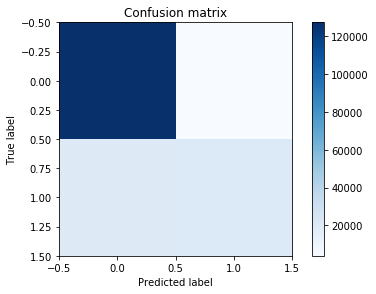

In [31]:
##visualizing the confusion matrix
def plot_confusion_matrix(cm, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(matrix)
##comparatively bad at predicting TN than catboost

In [32]:
##no feature engineering as of yet, will look at correlation as well afterwards
##also didn't deal with the null values in Credit_Product properly, to be kept in mind for v2
##reading the test data and getting the predictions now, duplicates have been checked for in Excel
test = pd.read_csv('test_mSzZ8RL.csv')
test.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [33]:
##should have created a funcion to get the dummies and fill the null values so that the steps are not repeated for test set
##alas!
##Converting the categorical to numerical variable
test_null = test.fillna('Unknown')

dummies_test = pd.get_dummies(data=test_null, columns=['Gender', 'Occupation', 'Channel_Code',
                                                 'Is_Active', 'Credit_Product', 'Region_Code'])

dummies_test.head(5)

,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,VBENBARO,29,25,742366,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCMEWNKY,43,49,925537,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,VK3KGA9M,31,14,215949,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TT8RPZVC,29,33,868070,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SHQZEYTZ,29,19,657087,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
##getting the predicted value for test set
test_dummies_x = dummies_test.drop(['ID'], axis = 1)
test_predict_y = clf.predict_proba(test_dummies_x)[:,1]
df_test_y = pd.DataFrame(test_predict_y, columns = ['Is_Lead'])
df_test_x = dummies_test[['ID']]
output = df_test_x.join(df_test_y)
# output.to_csv('hackathon_output_v3.csv', index = False)

In [34]:
##getting the feature importance using logarithmic regression 

In [35]:
##Converting the categorical to numerical variable

dummies_new = pd.get_dummies(data=df_train, columns=['Gender', 'Occupation', 'Channel_Code',
                                                 'Is_Active', 'Credit_Product', 'Region_Code'])

dummies_new.head(5)

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,NNVBBKZB,73,43,1045696,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,IDD62UNG,30,32,581988,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,56,26,1484315,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BF3NC7KV,34,19,470454,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,TEASRWXV,30,33,886787,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Showing which features are important and which have high outliers

In [36]:
##started building the first model without feature engineering to identify the important features 
##and then backtrack accordingly
#importing the important libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, linear_model, metrics, tree

import matplotlib.pylab as plt
%matplotlib inline

In [38]:
##getting the train test split
train_y = dummies_new['Is_Lead']
train_x = dummies_new.drop(['ID', 'Is_Lead'], axis = 1)

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.7, random_state = 32)

In [39]:
parameters = {'C':[0.1, 0.3, 0.6, 0.9], 'penalty':['l2']} #C parameter is 1 - regularisation lambda
mod = linear_model.LogisticRegression()
clf = GridSearchCV(mod, parameters, cv= 2, n_jobs=1, verbose=3, scoring='roc_auc')
clf.fit(train_x, train_y) #performing a grid search for all listed value of C
preds = clf.predict_proba(test_x)[:, 1]

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] C=0.1, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.447, total=   0.3s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................... C=0.1, penalty=l2, score=0.448, total=   0.2s
[CV] C=0.3, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.3, penalty=l2, score=0.447, total=   0.2s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.3, penalty=l2, score=0.448, total=   0.2s
[CV] C=0.6, penalty=l2 ...............................................


C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.6, penalty=l2, score=0.447, total=   0.2s
[CV] C=0.6, penalty=l2 ...............................................


C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.6, penalty=l2, score=0.448, total=   0.2s
[CV] C=0.9, penalty=l2 ...............................................


C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.9, penalty=l2, score=0.447, total=   0.3s
[CV] C=0.9, penalty=l2 ...............................................


C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.9, penalty=l2, score=0.448, total=   0.3s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.8s finished
C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
mod = linear_model.LogisticRegression(C = 0.1, penalty = 'l2')
mod.fit(train_x, train_y)
preds = mod.predict_proba(test_x)[:, 1]

C:\Users\Saptarshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
##this was done at first and then I thought of removing Region code as a feature, ut catboost performed better with 
##region code as a feature, so did not remove it
for importance, name in sorted(zip(mod.coef_[0], train_x.columns), reverse = True)[:]:
    print(name, importance)

Channel_Code_X3 9.811764741469343e-14
Occupation_Entrepreneur 4.4989571364320624e-14
Region_Code_RG253 -9.911241177902392e-15
Region_Code_RG265 -1.0208100035057633e-14
Region_Code_RG284 -1.3735594136966538e-14
Region_Code_RG276 -1.3942090646073496e-14
Region_Code_RG278 -1.4035245458811689e-14
Region_Code_RG258 -1.667420123393161e-14
Region_Code_RG255 -1.6862861147387748e-14
Region_Code_RG262 -1.7174463532423946e-14
Region_Code_RG271 -2.0165291104336154e-14
Region_Code_RG267 -2.1038479446110517e-14
Region_Code_RG266 -2.249658701962298e-14
Region_Code_RG283 -2.8301554554308376e-14
Region_Code_RG259 -3.06765007538713e-14
Region_Code_RG273 -3.175557767426636e-14
Region_Code_RG250 -3.206208753398912e-14
Region_Code_RG263 -3.364185529163754e-14
Region_Code_RG260 -3.6575970627374086e-14
Region_Code_RG275 -3.673419499228898e-14
Region_Code_RG256 -3.9247043890708104e-14
Region_Code_RG264 -3.9781742409491275e-14
Region_Code_RG279 -4.150584750953277e-14
Channel_Code_X4 -4.2390868689592736e-14
Reg

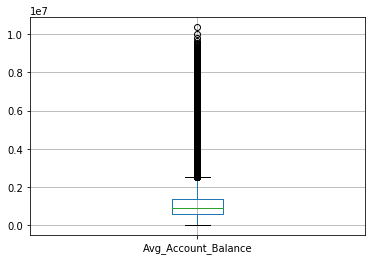

In [46]:
##to check for outliers
boxplot = dummies_new.boxplot(column=['Avg_Account_Balance'])  #'Vintage', 'Avg_Account_Balance', 'Age

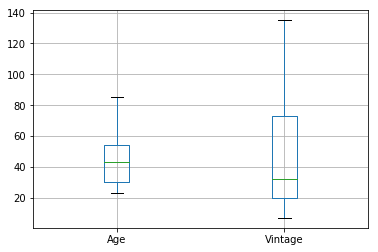

In [48]:
##to check for outliers
boxplot_2 = dummies_new.boxplot(column=['Age', 'Vintage'])